# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py`
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

_This notebook was tested on 2024-02-03 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

<Figure size 1000x600 with 0 Axes>

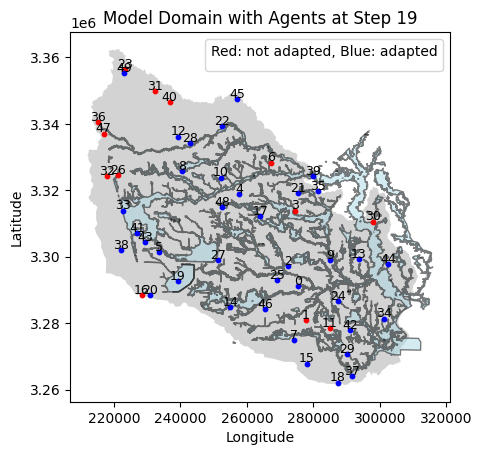

In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz",top_down=True, people_centered=True) # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matop_downlotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 19 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        #fig, ax = plt.subplots(figsize=(7, 7))
        #plot_network(ax, model)
        #plt.show()

In [2]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
0    0                   1.113171              0.667019          0.000000   
     1                   0.000000              0.000000          0.000000   
     2                   0.821201              0.613906          0.000000   
     3                   0.000000              0.000000          0.000000   
     4                   0.391060              0.484369          0.000000   
...                           ...                   ...               ...   
19   45                  1.675533              0.738417          1.987707   
     46                  0.324077              0.451565          0.199435   
     47                  0.000000              0.000000          0.000000   
     48                  0.250851              0.406846          0.198927   
     49                  0.585464              0.554828          0.407852   

              FloodDamageActual  IsAdapted  RiskAppraisal  CopingAppraisal  \
Step AgentID                                                                 
0    0                 0.000000      False       0.056680         0.040210   
     1                 0.000000      False       0.000000         0.000000   
     2                 0.000000      False       0.004845         0.071751   
     3                 0.000000      False       0.000000         0.000000   
     4                 0.000000      False       0.018161         0.005341   
...                         ...        ...            ...              ...   
19   45                0.768247       True       0.671323         0.690300   
     46                0.366798       True       0.395313         0.418442   
     47                0.000000      False       0.000000         0.000000   
     48                0.366353       True       0.439503         0.402172   
     49                0.491710       True       0.692077         0.690183   

                                                   location  
Step AgentID                                                 
0    0          POINT (275388.677059494 3291162.2310472843)  
     1         POINT (277713.7103064551 3281004.8104835735)  
     2          POINT (272366.97470588546 3297231.56808503)  
     3        POINT (274619.75429597363 3313918.0453199856)  
     4        POINT (257650.39401488993 3318792.0424302737)  
...                                                     ...  
19   45       POINT (256976.45340707048 3347409.3291236754)  
     46       POINT (265546.38035587827 3284211.0171800116)  
     47        POINT (216856.0276676709 3337080.0673360038)  
     48        POINT (252633.06448663468 3314970.169872799)  
     49       POINT (223049.29418735593 3355415.3983795494)  

[1000 rows x 8 columns]

# Running the model multiple times and visualizing adapation variances

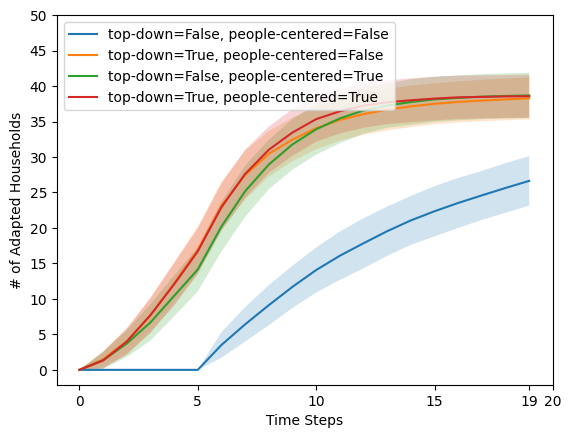

In [3]:
# Define the different top_down and people_centered settings
scenarios = [[False,False],[True,False],[False,True],[True,True]]

# Set the flood map choice to '100yr'
flood_map_choice = "harvey"
number_runs = 300
# Create a new figure
plt.figure()

adaptation_data = pd.DataFrame()

for s in scenarios:
    all_adaption_data = []

    # Run the model multiple times and collect data
    for i in range(number_runs):
        # Initialize the Adaptation Model with the current settings
        model = AdaptationModel(number_of_households=50, flood_map_choice=flood_map_choice, network="watts_strogatz", top_down=s[0], people_centered=s[1])

        # Run the model for 20 steps.
        for step in range(20):
            model.step()

        # Collect 'adapted_households' data
        model_data = model.datacollector.get_model_vars_dataframe()
        all_adaption_data.append(model_data['total_adapted_households'])

    # Convert list of DataFrames to a single DataFrame
    all_adaption_data_df = pd.concat(all_adaption_data, axis=1)
    adaptation_data = pd.concat([adaptation_data,all_adaption_data_df.iloc[-1,:]],axis=1,ignore_index=True)
    
    # Calculate mean and standard deviation
    mean_adaption = all_adaption_data_df.mean(axis=1)
    std_adaption = all_adaption_data_df.std(axis=1)

    # Create line plot for mean adaptation
    # sns.lineplot(data=mean_adaption, label=f'Mean {flood_map_choice} top_down={s[0]} people_centered={s[1]}')
    sns.lineplot(data=mean_adaption, label=f'top-down={s[0]}, people-centered={s[1]}')
    # Plot variance with Matop_downlotlib's fill_between
    plt.fill_between(range(len(mean_adaption)), mean_adaption-std_adaption, mean_adaption+std_adaption, alpha=0.2)

# Label axes
plt.xlabel('Time Steps')
plt.ylabel('# of Adapted Households')

# Change axis ticks to natural steps
plt.xticks(np.append(np.arange(0,len(mean_adaption)+1,5),19))
plt.yticks(np.arange(0, 51, 5))

# Add legend
plt.legend(loc='upper left')

# Show the plot
plt.show()

In [4]:
# adaptation_data.drop(columns=("none","top_down", "people_centered", "both"))
adaptation_data = pd.DataFrame(adaptation_data.to_numpy(),index=range(number_runs),columns=["none","top_down","people_centered","both"])
adaptation_data

,none,top_down,people_centered,both
0,31,40,42,39
1,29,39,42,44
2,35,31,39,47
3,26,38,41,36
4,33,36,39,38
...,...,...,...,...
295,30,37,36,39
296,30,34,39,41
297,22,41,34,33
298,23,38,39,38


# Statistical Tests on outcomes

In [5]:
from scipy import stats
stats.shapiro(adaptation_data.iloc[:,3])
# not a normal dist.

ShapiroResult(statistic=0.9847391071441004, pvalue=0.0028231084962884313)

In [6]:
stats.kruskal(adaptation_data.iloc[:,1],adaptation_data.iloc[:,2],adaptation_data.iloc[:,3])
# thus we can reject nul hypothesis, and therefore there is a significant difference between the scenarios
# -> scenarios are the same


KruskalResult(statistic=3.5964191066633564, pvalue=0.16559511217273962)

# Running the model multiple times and visualizing damage cost variances

0    22.352055
dtype: float64
0    16.070751
dtype: float64
0    14.690282
dtype: float64
0    14.594617
dtype: float64


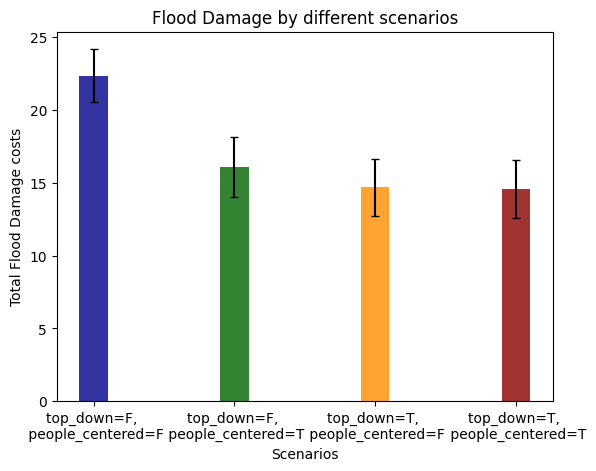

In [7]:
number_runs = 300
# Define the different top_down and people_centered settings
top_down_settings = [False, True]
people_centered_settings = [False, True]

flood_damage_data = pd.DataFrame()
# Set the flood map choice to 'harvey'
flood_map_choice = "harvey"

# Create a new figure
fig, ax = plt.subplots()

# Define the width of the bars
bar_width = 0.2

# Define the opacity for the bars
opacity = 0.8

# Define the bar positions
bar_positions = np.arange(4)
run = 0
# Iterate over the different top_down settings
for i, top_down in enumerate(top_down_settings):
    # Iterate over the different people_centered settings
    for j, people_centered in enumerate(people_centered_settings):
        # List to store data from each run
        all_data = []
        run+=1
        # Run the model multiple times and collect data
        for k in range(number_runs):
            # Initialize the Adaptation Model with the current settings
            model = AdaptationModel(number_of_households=50, flood_map_choice=flood_map_choice, network="watts_strogatz", top_down=top_down, people_centered=people_centered)

            # Run the model for 20 steps.
            for step in range(20):
                model.step()

            # Collect 'FloodDamageActual' data after each run
            model_data = model.datacollector.get_agent_vars_dataframe()
            flood_damage_actual = model_data['FloodDamageActual']
            flood_damage_actual_sum = flood_damage_actual.groupby(level=0, axis=0).sum()

            # Collect only 'total_flood_damage' data from the last step
            # Convert sum to DataFrame and append to list
            sum_df = pd.DataFrame([flood_damage_actual_sum.loc[19]], columns=[f'Run {k+1}'])
            all_data.append(sum_df)

        # Convert list of DataFrames to a single DataFrame
        all_data_df = pd.concat(all_data, axis=1)
        flood_damage_data = pd.concat([flood_damage_data,all_data_df],axis=0,ignore_index=True)
        # Calculate mean and standard deviation
        mean = all_data_df.mean(axis=1)
        print(mean)
        std = all_data_df.std(axis=1)

        # Create bar plot
        rects = ax.bar(bar_positions[run-1], mean, bar_width, alpha=opacity, color=['darkblue', 'darkorange', 'darkgreen', 'darkred'][i+j*2], yerr=std, capsize=3, label=f'top_down={top_down}, people_centered={people_centered}')

# Label axes
ax.set_xlabel('Scenarios')
ax.set_ylabel('Total Flood Damage costs') #since we studied the relationship of saved costs between various scenarios we kept the outcome a factor
ax.set_title('Flood Damage by different scenarios')
ax.set_xticks(bar_positions) # + bar_width / 2
ax.set_xticklabels(('top_down=F, \n people_centered=F', 'top_down=F, \n people_centered=T', 'top_down=T, \n people_centered=F', 'top_down=T, \n people_centered=T'),rotation=0)

# Show the plot
plt.show()

# Statistical Tests on outcomes

In [8]:
flood_damage_data.index= ["none","top_down","people_centered","both"]
flood_damage_data

,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,Run 9,Run 10,...,Run 291,Run 292,Run 293,Run 294,Run 295,Run 296,Run 297,Run 298,Run 299,Run 300
none,22.655306,22.651082,24.579880,22.271448,21.262922,26.179636,20.327643,21.294503,21.639030,22.773527,...,22.810760,19.202535,22.080689,23.140952,23.094103,22.967250,22.135180,22.141060,20.768718,23.664960
top_down,16.516350,16.482246,16.736752,19.579445,15.458664,16.792571,14.478629,15.850303,15.416666,16.084481,...,17.470405,17.037117,15.705396,15.922489,14.160211,18.512271,14.927991,14.237536,15.682874,15.042121
people_centered,14.757115,10.611893,12.871242,16.618806,10.452065,15.866017,14.383607,16.181081,11.935736,15.719227,...,13.768969,16.319568,14.552211,15.212993,13.154752,15.127754,18.723054,15.342183,14.666490,11.536801
both,14.595169,13.876182,13.629278,15.942300,15.767072,12.678620,11.911778,14.772482,13.452560,15.283864,...,17.759741,17.248408,14.791129,11.381645,12.968439,15.800734,19.580019,11.361381,16.545308,15.722170


In [9]:
stats.shapiro(flood_damage_data.iloc[2,:])

ShapiroResult(statistic=0.9966481961234958, pvalue=0.785364865413442)

In [10]:
stats.wilcoxon(flood_damage_data.iloc[3,:],flood_damage_data.iloc[2,:])

WilcoxonResult(statistic=22118.0, pvalue=0.7611987412861774)